# Keahlian dalam Coding Mempengaruhi Estimasi Gaji Seorang Data Scientist

**Latar Belakang:**
Terdapat Lembaga Negara Yang ingin mengidentifikasi apa saja yang mempengaruhi gaji seorang Data scienctist, Menurut Springboard, data scientist harus memiliki kemampuan coding untuk menulis kode, menganalisis data, dan menggunakan alat analitis untuk mendapatkan insight atau wawasan dari datanya.

**Tujuan:**
untuk memahami hubungan antara keahlian coding, tingkat pendidikan, alat analitis yang menjadi faktor besar gaji seorang data scientist. Dengan menganalisis topik ini, kita dapat mengetahui apa saja yang memengaruhi gaji seorang data scientist, serta apa saja keahlian yang dibutuhkan dalam profesi ini, nantinya akan dilakukan clustering dengan parameter besar gajinya.

Hipotesis: Semakin Besar Gaji Maka Semakin Berkualitas Data Scientist.

# Data Preprocessing and Understanding

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #likley won't be used much as i'm experimenting with plotly
import plotly.graph_objects as go #you will be learning how go and px work with me!
import plotly.express as px

In [ ]:
# Loading Data:
import pandas as pd
#try: # Running Locally, yakinkan "file_" berada di folder "data"
#    df = pd.read_csv("kaggle_survey_2022_responses.csv", low_memory = False, encoding='utf8')

#except: # Running in Google Colab
!wget https://raw.githubusercontent.com/utamiamel/UTSDataminingUtami/main/kaggle_survey_2022_responses.csv
df = pd.read_csv("kaggle_survey_2022_responses.csv", low_memory=False, encoding='utf8')

--2023-11-25 12:59:58--  https://raw.githubusercontent.com/utamiamel/UTSDataminingUtami/main/kaggle_survey_2022_responses.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26018685 (25M) [text/plain]
Saving to: ‘kaggle_survey_2022_responses.csv.8’

kaggle_survey_2022_ 100%[===================>]  24.81M  --.-KB/s    in 0.1s    

2023-11-25 12:59:59 (171 MB/s) - ‘kaggle_survey_2022_responses.csv.8’ saved [26018685/26018685]



In [ ]:
df.head() # Menampilkan lima baris pertama dari DataFrame df

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [ ]:
df=df.drop(df.index[0]).reset_index()
df=df.drop(['index'], axis = 1)
df

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
3,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
4,232,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,331,22-24,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
23993,330,60-69,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23994,860,25-29,Man,Turkey,No,NaN,NaN,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23995,597,35-39,Woman,Israel,No,NaN,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Importing Some Python Modules
import warnings; warnings.simplefilter('ignore')
import pandas as pd

N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
print("Tipe Variabe df = ", type(df))

baris =  23997 , Kolom (jumlah variabel) =  296
Tipe Variabe df =  <class 'pandas.core.frame.DataFrame'>


In [ ]:
# Menghapus kolom pertama
df = df.drop(df.columns[0], axis=1)
df.head()

,Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,Udacity,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
3,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
4,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [ ]:
# Mengambil seluruh nama kolom
nama_kolom = df.columns.tolist()

# Menampilkan hasil
print(nama_kolom)

['Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q6_10', 'Q6_11', 'Q6_12', 'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 'Q8', 'Q9', 'Q10_1', 'Q10_2', 'Q10_3', 'Q11', 'Q12_1', 'Q12_2', 'Q12_3', 'Q12_4', 'Q12_5', 'Q12_6', 'Q12_7', 'Q12_8', 'Q12_9', 'Q12_10', 'Q12_11', 'Q12_12', 'Q12_13', 'Q12_14', 'Q12_15', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 'Q13_12', 'Q13_13', 'Q13_14', 'Q14_1', 'Q14_2', 'Q14_3', 'Q14_4', 'Q14_5', 'Q14_6', 'Q14_7', 'Q14_8', 'Q14_9', 'Q14_10', 'Q14_11', 'Q14_12', 'Q14_13', 'Q14_14', 'Q14_15', 'Q14_16', 'Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q15_5', 'Q15_6', 'Q15_7', 'Q15_8', 'Q15_9', 'Q15_10', 'Q15_11', 'Q15_12', 'Q15_13', 'Q15_14', 'Q15_15', 'Q16', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4', 'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11', 'Q17_12', 'Q17_13', 'Q17_14', 'Q17_15', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7',

# Data Filtering and Transformation

Melihat beberapa data pendidikan terakhir

In [ ]:
# Menghitung jumlah masing-masing tingkat pendidikan terakhir
education_counts = df['Q8'].value_counts()

# Menampilkan hasil
print(education_counts)

Master’s degree                                                      9142
Bachelor’s degree                                                    7625
Doctoral degree                                                      2657
Some college/university study without earning a bachelor’s degree    1431
I prefer not to answer                                               1394
Professional doctorate                                                585
No formal education past high school                                  564
Name: Q8, dtype: int64


Menggabungkan "Some college/university study without earning a bachelor’s degree" dengan "Bachelor’s degree" karena keduanya melibatkan pengalaman perkuliahan, sementara "I prefer not to answer" akan digabungkan dengan "No formal education past high school" karena mungkin menunjukkan ketidakpastian terhadap tingkat pendidikan formal.

In [ ]:
# Menggabungkan kategori pendidikan
df['Q8'] = df['Q8'].replace({
    'Some college/university study without earning a bachelor’s degree': 'Bachelor’s degree', #menggabungkan 'Some college/university study without earning a bachelor’s degree' dengan 'Bachelors degree'
    'I prefer not to answer': 'No formal education past high school' #menggabungkan 'No formal education past high school' dengan 'I prefer not to answer'
})

Hanya data dari dua jenis kelamin, yaitu pria dan wanita, yang akan dipertahankan untuk analisis ini. Jenis kelamin lainnya akan dihapus dari dataset karena tidak relevan untuk perbandingan yang sedang dilakukan.

In [ ]:
# List of values to exclude
include_values = ['Man', 'Woman']

# Filter DataFrame hanya untuk nilai yang diinginkan
df = df[df['Q3'].isin(include_values)]

# Tampilkan nilai unik
df[['Q3', 'Q23']]

,Q3,Q23
0,Man,NaN
1,Man,NaN
2,Man,NaN
3,Man,Data Scientist
4,Man,NaN
...,...,...
23992,Man,NaN
23993,Man,NaN
23994,Man,Engineer (non-software)
23995,Woman,Research Scientist


# Memilih Role Data Scienctist

Karena kita hanya ingin menganalisis responden dengan role Data Scientist maka akan dilakukan filterisasi terlebih dahulu

In [ ]:
# Filter hanya untuk entri yang terkait dengan "Data Science" dalam kolom "Job"
df_ds = df[df['Q23'].isin(["Data Scientist"])]
#membuat dictionary untuk kolom nya
Questions_ds = {}
#membuat daftar pertanyaan menjadi lebih terstruktur dengan menghilangkan "_" nya
qnums_ds = list(dict.fromkeys([i.split('_')[0] for i in df_ds.columns]))
#add data for each question to key value pairs in dictionary
for i in qnums_ds:
    if i in ['Q1','Q2','Q3']: #Jika kita menggunakan .startswith(), ini akan menghindari semua pertanyaan yang dimulai dari 'Q1','Q2','Q3'.
        Questions_ds[i] = df_ds[i] #Menghindari 'Q1','Q2','Q3' masuk ke dalam analisis, kerena datanya berupa informasi
    else:
        Questions_ds[i] = df_ds[[q for q in df_ds.columns if q.startswith(i)]]

In [ ]:
df_ds.describe()

,Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
count,1896,1896,1896,1896,1025,302,541,437,161,307,...,303,1032,323,990,256,1011,466,175,49,90
unique,11,2,58,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,25-29,Man,India,No,Coursera,edX,Kaggle Learn Courses,DataCamp,Fast.ai,Udacity,...,"Reddit (r/machinelearning, etc)","Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...","YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...","Slack Communities (ods.ai, kagglenoobs, etc)",None,Other
freq,479,1588,553,1896,1025,302,541,437,161,307,...,303,1032,323,990,256,1011,466,175,49,90


# Exploratory Data Analysis (EDA)

### Apa tingkat pendidikan terakhir yang umumnya dimiliki oleh data scientist?





In [ ]:
education_counts = df['Q8'].value_counts().reset_index()
education_counts.columns = ['index', 'counts']

In [ ]:
# Membuat plot dengan Plotly Express dan menambahkan label jumlah
fig = px.bar(education_counts, x='index', y='counts',
             title='Perbandingan Pendidikan Data Scientist',
             labels={'index': 'Tingkat Pendidikan', 'counts': 'Jumlah'},
             category_orders={'index': ['No formal education past high school', 'Bachelor’s degree',
                                        'Master’s degree', 'Doctoral degree', 'Professional doctorate']},
             barmode='group',
             text='counts',  # Menambahkan label jumlah pada setiap bar
             )

# Menyesuaikan tata letak label
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Menampilkan plot
fig.show()

Dari data diatas dapat disimpulkan bahwa pendidikan terakhir data science paling banyak yaitu master's degree dengan jumlah 8987, yang berarti bahwa rata rata data science melanjutkan pendidikannya setelah sarjana.

### Bagaimana perbandingan pendidikan antara laki laki dan perempuan dalam dunia pendidikan? terutama sebagai seorang data scientist





In [ ]:
# Hitung frekuensi untuk setiap kombinasi Q3 dan tingkat pendidikan
df_counts = df_ds.groupby(['Q3', 'Q8']).size().reset_index(name='counts')

# Buat plot dengan Plotly Express
fig = px.bar(df_counts, x='Q8', y='counts', color='Q3',
             title='Perbandingan Pendidikan antara Laki-laki dan Perempuan sebagai data scientist',
             labels={'Q8': 'Tingkat Pendidikan', 'counts': 'Jumlah', 'Q3': 'Jenis Kelamin'},
             category_orders={'Q3': ['Man', 'Woman'],
                              'Q8': ['No formal education past high school', 'Bachelor’s degree',
                                            'Master’s degree', 'Doctoral degree', 'Professional doctorate']},
             barmode='group')
fig.show()

Terlihat bahwa dari semua tingkat pendidikan didominasi oleh laki-laki. Jumlah data scientist pria jauh lebih tinggi daripada jumlah wanita dalam industri ini, yang menunjukkan ketidakseimbangan gender. Oleh karena itu penting untuk mendorong keberagaman dan inklusi gender dalam profesi data science. Dukungan terhadap partisipasi wanita di bidang ini dapat menjadi strategi penting untuk mencapai kesetaraan dan memanfaatkan potensi maksimal industri data science.

### Apakah terdapat korelasi antara lama pengalaman coding dan tingkat pendidikan yang memengaruhi tren gaji?

In [ ]:
import pandas as pd
import plotly.express as px

# Check for missing values and remove them
df_cleaned = df[['Q11', 'Q29']]

# Mapping coding experience to numerical values
experience_mapping = {
    'I have never written code': 0,
    '< 1 years': 0.5,
    '1-2 years': 1.5,
    '3-5 years': 4,
    '5-10 years': 7.5,
    '10-20 years': 15,
    '20+ years': 20,
}

df_cleaned['Q11'] = df_cleaned['Q11'].map(experience_mapping)

# Mapping compensation to numerical values
compensation_mapping = {
    '$0-999': 500,
    '$1,000-1,999': 1500,
    '$2,000-2,999': 2500,
    '$3,000-3,999': 3500,
    '$4,000-4,999': 4500,
    '$5,000-7,499': 6250,
    '$7,500-9,999': 8750,
    '$10,000-14,999': 12500,
    '$15,000-19,999': 17500,
    '$20,000-24,999': 22500,
    '$25,000-29,999': 27500,
    '$30,000-39,999': 35000,
    '$40,000-49,999': 45000,
    '$50,000-59,999': 55000,
    '$60,000-69,999': 65000,
    '$70,000-79,999': 75000,
    '$80,000-89,999': 85000,
    '$90,000-99,999': 95000,
    '$100,000-124,999': 112500,
    '$125,000-149,999': 137500,
    '$150,000-199,999': 175000,
    '$200,000-249,999': 225000,
    '$250,000-299,999': 275000,
    '$300,000-499,999': 400000,
    '$500,000-999,999': 750000,
    '>$1,000,000': 1000000,
}

df_cleaned['Q29'] = df_cleaned['Q29'].map(compensation_mapping)

# Aggregate data by taking the mean for each coding experience
df_aggregated = df_cleaned.groupby('Q11', as_index=False).mean()

# Plotly Line Plot
fig = px.line(df_aggregated, x='Q11', y='Q29', markers=True, line_shape='linear', title='Trend of Coding Experience vs Median Annual Compensation')
fig.update_layout(xaxis_title='Coding Experience (Years)', yaxis_title='Median Annual Compensation ($USD)')

# Show the plot
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming df is your original DataFrame
df_cleaned = df[['Q8', 'Q29']]

# Mapping education to numerical values
education_mapping = {
    'No formal education past high school': 1,
    'Some college/university study without earning a bachelor’s degree': 2,
    'Bachelor’s degree': 3,
    'Master’s degree': 4,
    'Doctoral degree': 5,
    'Professional doctorate': 6,
}

# Mapping compensation to numerical values
compensation_mapping = {
    '$0-999': 500,
    '$1,000-1,999': 1500,
    '$2,000-2,999': 2500,
    '$3,000-3,999': 3500,
    '$4,000-4,999': 4500,
    '$5,000-7,499': 6250,
    '$7,500-9,999': 8750,
    '$10,000-14,999': 12500,
    '$15,000-19,999': 17500,
    '$20,000-24,999': 22500,
    '$25,000-29,999': 27500,
    '$30,000-39,999': 35000,
    '$40,000-49,999': 45000,
    '$50,000-59,999': 55000,
    '$60,000-69,999': 65000,
    '$70,000-79,999': 75000,
    '$80,000-89,999': 85000,
    '$90,000-99,999': 95000,
    '$100,000-124,999': 112500,
    '$125,000-149,999': 137500,
    '$150,000-199,999': 175000,
    '$200,000-249,999': 225000,
    '$250,000-299,999': 275000,
    '$300,000-499,999': 400000,
    '$500,000-999,999': 750000,
    '>$1,000,000': 1000000,
}

df_cleaned['Q29'] = df_cleaned['Q29'].map(compensation_mapping)

df_cleaned['Q8'] = df_cleaned['Q8'].map(education_mapping)

In [ ]:
# Aggregate data by taking the mean for each education level
df_aggregated = df_cleaned.groupby('Q8', as_index=False).mean()

# Plotly Line Plot
fig = px.line(df_aggregated, x='Q8', y='Q29', markers=True, line_shape='linear', title='Trend of Education vs Median Annual Compensation')
fig.update_layout(xaxis_title='Education Level', yaxis_title='Median Annual Compensation ($USD)')

# Customize x-axis labels to reflect education levels
education_labels = {1: 'No formal education', 2: 'Some college/university', 3: 'Bachelor’s degree', 4: 'Master’s degree', 5: 'Doctoral degree', 6: 'Professional doctorate'}
fig.update_xaxes(tickvals=list(education_labels.keys()), ticktext=list(education_labels.values()))

# Show the plot
fig.show()


Deskripsi grafik tersebut menunjukkan bahwa pengalaman lama ngoding mempengaruhi gaji, hal ini karena semakin banyak pengalaman yang dimiliki seseorang dalam coding atau pemrograman, cenderung akan berdampak positif terhadap gaji mereka. Pengalaman yang lebih luas biasanya dihubungkan dengan kemampuan yang lebih tinggi dalam menyelesaikan tugas yang kompleks dan mengatasi tantangan dalam proyek data science. Ini sering kali diakomodasi dengan penghargaan dalam bentuk gaji yang lebih tinggi.


Selain itu dari grafik diatas, tingkat pendidikan yang lebih tinggi juga memberikan kontribusi positif terhadap tingkat gaji, hal ini karena tingkat pendidikan juga dapat memengaruhi gaji seseorang dalam industri data science. Biasanya, tingkat pendidikan yang lebih tinggi, seperti gelar master atau doktor, dapat membuka pintu untuk peran-peran yang lebih senior atau spesialis, yang cenderung memiliki kompensasi yang lebih tinggi.

### Bagaimana dengan pengalaman menggunakan machine learning? apakah pengalaman menggunakan machine learning berpengaruh terhadap gaji?

In [ ]:
df_ds['Q16'].unique()

array(['1-2 years', '5-10 years', '2-3 years', '4-5 years',
       'Under 1 year', '10-20 years', '3-4 years', nan,
       'I do not use machine learning methods'], dtype=object)

In [ ]:
# Mapping compensation to numerical values
compensation_mapping = {
    '$0-999': 500, '$1,000-1,999': 1500, '$2,000-2,999': 2500,
    '$3,000-3,999': 3500, '$4,000-4,999': 4500, '$5,000-7,499': 6250,
    '$7,500-9,999': 8750, '$10,000-14,999': 12500, '$15,000-19,999': 17500,
    '$20,000-24,999': 22500, '$25,000-29,999': 27500, '$30,000-39,999': 35000,
    '$40,000-49,999': 45000, '$50,000-59,999': 55000, '$60,000-69,999': 65000,
    '$70,000-79,999': 75000, '$80,000-89,999': 85000, '$90,000-99,999': 95000,
    '$100,000-124,999': 112500, '$125,000-149,999': 137500, '$150,000-199,999': 175000,
    '$200,000-249,999': 225000, '$250,000-299,999': 275000, '$300,000-499,999': 400000,
    '$500,000-999,999': 750000, '>$1,000,000': 1000000,
}

# Sample data for illustration
experience_data = [
    np.nan, 'Under 1 year', '1-2 years',
    'I do not use machine learning methods', '4-5 years', '5-10 years',
    '3-4 years', '2-3 years', '10-20 years', '20 or more years'
]

# Simulating sample salary data based on the experience categories
salary_data = [
    '$90,000-99,999', '$40,000-49,999', '$70,000-79,999',
    '$30,000-39,999', '$150,000-199,999', '$100,000-124,999',
    '$50,000-59,999', '$60,000-69,999', '$200,000-249,999', '$250,000-299,999'
]

# Creating a DataFrame with the sample data
df = pd.DataFrame({'Experience': experience_data, 'Salary': salary_data})

# Mapping the salary categories to numerical values
df['Salary_Num'] = df['Salary'].map(compensation_mapping)

# Creating the plot
fig = px.bar(df, x='Experience', y='Salary_Num', title='Gaji Berdasarkan Pengalaman Menggunakan Machine Learning',
             labels={'Experience': 'Pengalaman menggunakan ML', 'Salary_Num': 'Gaji'})
fig.update_layout(yaxis_tickformat="$,.2f")

# Showing the plot
fig.show()

Dari visualisasi tersebut kita bisa lihat, tidak menggunakan machine learning, dan pengalaman yang sedikit mempunyai gaji yang lebih kecil dibanding yang punya pengalaman machine learning. Seiring bertambahnya pengalaman menggunakan machine learning method, semakin tinggi juga gaji yang didapat.

#Clustering

Akan dilakukan filtering terhadap seluruh atribut data untuk di lakukannya clustering, karena kita hanya membutuhkan :

1. Berapa tahun melakukan coding (Q11)
2. Bahasa Pemograman yang digunakan (Q12)
3. Modul Visualisasi yang digunakan. (Q15)
4. Tingkat Pendidikan (Q8)
5. Algoritma Machine Learning. (Q18)
6. Gaji per tahun (Q29)

##Persiapan data Clustering

In [ ]:
column_names_list = list(df_ds.columns)
print("Column names as a list:", column_names_list)

Column names as a list: ['Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q6_10', 'Q6_11', 'Q6_12', 'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 'Q8', 'Q9', 'Q10_1', 'Q10_2', 'Q10_3', 'Q11', 'Q12_1', 'Q12_2', 'Q12_3', 'Q12_4', 'Q12_5', 'Q12_6', 'Q12_7', 'Q12_8', 'Q12_9', 'Q12_10', 'Q12_11', 'Q12_12', 'Q12_13', 'Q12_14', 'Q12_15', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 'Q13_12', 'Q13_13', 'Q13_14', 'Q14_1', 'Q14_2', 'Q14_3', 'Q14_4', 'Q14_5', 'Q14_6', 'Q14_7', 'Q14_8', 'Q14_9', 'Q14_10', 'Q14_11', 'Q14_12', 'Q14_13', 'Q14_14', 'Q14_15', 'Q14_16', 'Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q15_5', 'Q15_6', 'Q15_7', 'Q15_8', 'Q15_9', 'Q15_10', 'Q15_11', 'Q15_12', 'Q15_13', 'Q15_14', 'Q15_15', 'Q16', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4', 'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11', 'Q17_12', 'Q17_13', 'Q17_14', 'Q17_15', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q

In [ ]:
# Melakukan one hot encoding terhadap data multiple choice
df_encoded = df_ds[['Q12_1', 'Q12_2', 'Q12_3', 'Q12_4', 'Q12_5', 'Q12_6', 'Q12_7', 'Q12_8', 'Q12_9', 'Q12_10', 'Q12_11', 'Q12_12', 'Q12_13', 'Q12_14', 'Q12_15','Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q15_5', 'Q15_6', 'Q15_7', 'Q15_8', 'Q15_9', 'Q15_10', 'Q15_11', 'Q15_12', 'Q15_13', 'Q15_14', 'Q15_15','Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_6', 'Q18_7', 'Q18_9']]
df_encoded = pd.get_dummies(df_encoded)

# Mengubah kategorik menjadi numerik
df_label = df_ds[['Q8', 'Q11', 'Q29']]

# Mengubah kategorik kategorik menjadi numerik
education_mapping = {
    'No formal education past high school': 1,
    'Bachelor’s degree': 2,
    'Master’s degree': 3,
    'Doctoral degree': 4,
    'Professional doctorate': 5,
}

df_label['Q8'] = df_label['Q8'].map(education_mapping)

# Mapping coding experience to numerical values
experience_mapping = {
    'I have never written code': 0,
    '< 1 years': 0.5,
    '1-2 years': 1.5,
    '3-5 years': 4,
    '5-10 years': 7.5,
    '10-20 years': 15,
    '20+ years': 20,
}

df_label['Q11'] = df_label['Q11'].map(experience_mapping)

# Mapping compensation to numerical values
compensation_mapping = {
    '$0-999': 500,
    '$1,000-1,999': 1500,
    '$2,000-2,999': 2500,
    '$3,000-3,999': 3500,
    '$4,000-4,999': 4500,
    '$5,000-7,499': 6250,
    '$7,500-9,999': 8750,
    '$10,000-14,999': 12500,
    '$15,000-19,999': 17500,
    '$20,000-24,999': 22500,
    '$25,000-29,999': 27500,
    '$30,000-39,999': 35000,
    '$40,000-49,999': 45000,
    '$50,000-59,999': 55000,
    '$60,000-69,999': 65000,
    '$70,000-79,999': 75000,
    '$80,000-89,999': 85000,
    '$90,000-99,999': 95000,
    '$100,000-124,999': 112500,
    '$125,000-149,999': 137500,
    '$150,000-199,999': 175000,
    '$200,000-249,999': 225000,
    '$250,000-299,999': 275000,
    '$300,000-499,999': 400000,
    '$500,000-999,999': 750000,
    '>$1,000,000': 1000000,
}

df_label['Q29'] = df_label['Q29'].map(compensation_mapping)

# Menggabungkan dua DataFrames
df_cluster = pd.concat([df_encoded, df_label], axis =1 )

# Mengisi nilai NaN pada kolom 'Q11' dengan median
df_cluster['Q11'].fillna(df_cluster['Q11'].median(), inplace=True)

# Mengisi nilai NaN pada kolom 'Q29' dengan median
df_cluster['Q29'].fillna(df_cluster['Q29'].median(), inplace=True)


In [ ]:
df_cluster.isnull().sum()

Q12_1_Python                                                 0
Q12_2_R                                                      0
Q12_3_SQL                                                    0
Q12_4_C                                                      0
Q12_5_C#                                                     0
Q12_6_C++                                                    0
Q12_7_Java                                                   0
Q12_8_Javascript                                             0
Q12_9_Bash                                                   0
Q12_10_PHP                                                   0
Q12_11_MATLAB                                                0
Q12_12_Julia                                                 0
Q12_13_Go                                                    0
Q12_14_None                                                  0
Q12_15_Other                                                 0
Q15_1_ Matplotlib                                      

In [ ]:
df_cluster['Q8'].unique()

array([2, 3, 4, 5, 1])

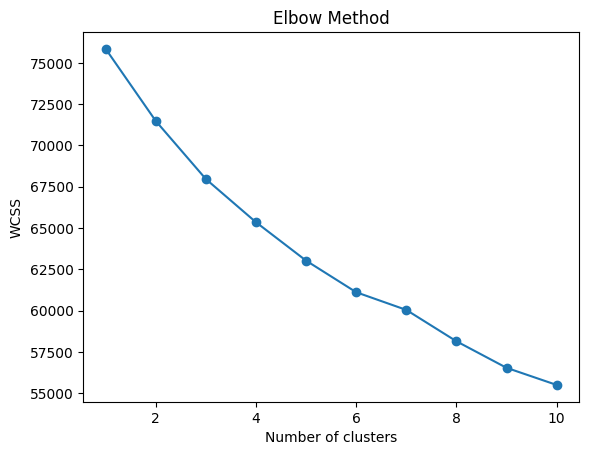

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Melakukan scaling data menggunakan StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)  # Use df_cluster here

# Menggunakan Elbow Method untuk menentukan jumlah cluster yang optimal
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

Dari gambar terlihat jika tren mulai melambat ketika k=3, maka akan dilakukan clustering(K-means) dengan k=3

In [ ]:
# Melakukan k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_ds['Cluster'] = kmeans.fit_predict(df_scaled)  # Use df_cluster here
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)  # Use df_cluster here

In [ ]:
df0 = df_ds[df_ds['Cluster'] == 0]
df1 = df_ds[df_ds['Cluster'] == 1]
df2 = df_ds[df_ds['Cluster'] == 2]

In [ ]:
df00 = df_cluster[df_cluster['Cluster'] == 0]
df11 = df_cluster[df_cluster['Cluster'] == 1]
df22 = df_cluster[df_cluster['Cluster'] == 2]

In [ ]:
df00[['Q29','Cluster']].describe()

,Q29,Cluster
count,209.000000,209.0
mean,26801.435407,0.0
std,154654.119507,0.0
min,500.000000,0.0
25%,500.000000,0.0
50%,500.000000,0.0
75%,500.000000,0.0
max,1000000.000000,0.0


In [ ]:
df11[['Q29','Cluster']].describe()

,Q29,Cluster
count,1471.000000,1471.0
mean,2708.021754,1.0
std,42674.845188,0.0
min,500.000000,1.0
25%,500.000000,1.0
50%,500.000000,1.0
75%,500.000000,1.0
max,1000000.000000,1.0


In [ ]:
df22[['Q29','Cluster']].describe()

,Q29,Cluster
count,216.000000,216.0
mean,12067.129630,2.0
std,98679.662065,0.0
min,500.000000,2.0
25%,500.000000,2.0
50%,500.000000,2.0
75%,500.000000,2.0
max,1000000.000000,2.0


Labeling:

df1: cluster 1 Kelompok Gaji Terkecil

df2: cluster 2 Kelompok Gaji Menengah

df0: cluster 0 Kelompok Gaji Tertinggi

In [ ]:
df2 = df2.drop(columns=["Cluster"])
df1 = df1.drop(columns=["Cluster"])
df0 = df0.drop(columns=["Cluster"])

In [ ]:
# Membuat dictionary untuk kolom nya
Questions0 = {}

# Membuat daftar pertanyaan menjadi lebih terstruktur dengan menghilangkan "_" nya
qnums = list(dict.fromkeys([i.split('_')[0] for i in df0.columns]))

# Add data for each question to key-value pairs in the dictionary
for i in qnums:
    if i in ['Q1', 'Q2', 'Q3']:
        Questions0[i] = df0[i]
    else:
        Questions0[i] = df0[[q for q in df0.columns if q.startswith(i)]]

In [ ]:
# Membuat dictionary untuk kolom nya
Questions1 = {}

# Membuat daftar pertanyaan menjadi lebih terstruktur dengan menghilangkan "_" nya
qnums = list(dict.fromkeys([i.split('_')[0] for i in df1.columns]))

# Add data for each question to key-value pairs in the dictionary
for i in qnums:
    if i in ['Q1', 'Q2', 'Q3']:
        Questions1[i] = df1[i]
    else:
        Questions1[i] = df1[[q for q in df1.columns if q.startswith(i)]]

In [ ]:
# Membuat dictionary untuk kolom nya
Questions2 = {}

# Membuat daftar pertanyaan menjadi lebih terstruktur dengan menghilangkan "_" nya
qnums = list(dict.fromkeys([i.split('_')[0] for i in df2.columns]))

# Add data for each question to key-value pairs in the dictionary
for i in qnums:
    if i in ['Q1', 'Q2', 'Q3']:
        Questions2[i] = df2[i]
    else:
        Questions2[i] = df2[[q for q in df2.columns if q.startswith(i)]]

# Analisis Hasil Cluster

###Bagaimanakah perbandingan pengalaman coding masing masing cluster?

In [ ]:
# Hitung frekuensi pengalaman koding di cluster dengan Gaji Terendah
df_counts = df1.groupby(['Q11']).size().reset_index(name='counts')
df_counts
import plotly.express as px

# Hitung frekuensi untuk setiap kombinasi Q11 di cluster dengan Gaji Terendah
df_counts = df1['Q11'].value_counts().reset_index().rename(columns={'index': 'Pengalaman_Coding', 'Q11': 'Jumlah'})

# Hitung total responden di cluster dengan Gaji Terendah
total_respondents = len(df1)

# Hitung rasio pengalaman coding
df_counts['Ratio'] = df_counts['Jumlah'] / total_respondents

# Buat pie plot dengan Plotly Express
fig = px.pie(df_counts, names='Pengalaman_Coding', values='Ratio',
             title='Distribusi Pengalaman Coding di Cluster dengan Gaji Terendah',
             labels={'Pengalaman_Coding': 'Pengalaman Coding (Tahun)', 'Ratio': 'Rasio'})

fig.show()


Ketika gaji rata rata oranganya rendah maka dapat dilihat jika pengalaman orang dengan pengalaman menulis kodenya hanya 7.41%

In [ ]:
# Hitung frekuensi pengalaman koding di cluster dengan Gaji Menengah
df_counts = df2.groupby(['Q11']).size().reset_index(name='counts')
df_counts

import plotly.express as px

# Hitung frekuensi untuk setiap kombinasi Q11 di cluster dengan Gaji Menengah
df_counts = df2['Q11'].value_counts().reset_index().rename(columns={'index': 'Pengalaman_Coding', 'Q11': 'Jumlah'})

# Hitung total responden di cluster dengan Gaji Menengah
total_respondents = len(df2)

# Hitung rasio pengalaman coding
df_counts['Ratio'] = df_counts['Jumlah'] / total_respondents

# Buat pie plot dengan Plotly Express
fig = px.pie(df_counts, names='Pengalaman_Coding', values='Ratio',
             title='Distribusi Pengalaman Coding di Cluster dengan Gaji Menengah',
             labels={'Pengalaman_Coding': 'Pengalaman Coding (Tahun)', 'Ratio': 'Rasio'})

fig.show()

Ketika seorang data scienctist dengan gaji menengah pengalaman seseorang menulis kode lebih dari 20 tahun pun terlihat semakin meningkat

In [ ]:
# Hitung frekuensi pengalaman koding di cluster dengan Gaji Tertinggi
df_counts = df0.groupby(['Q11']).size().reset_index(name='counts')
df_counts
# Hitung frekuensi pengalaman koding di cluster dengan Gaji Tertinggi
df_counts = df0.groupby(['Q11']).size().reset_index(name='counts')
df_counts
import plotly.express as px

# Hitung frekuensi untuk setiap kombinasi Q11 di cluster dengan Gaji Tertinggi
df_counts = df0['Q11'].value_counts().reset_index().rename(columns={'index': 'Pengalaman_Coding', 'Q11': 'Jumlah'})

# Hitung total responden di cluster dengan Gaji Tertinggi
total_respondents = len(df0)

# Hitung rasio pengalaman coding
df_counts['Ratio'] = df_counts['Jumlah'] / total_respondents

# Buat pie plot dengan Plotly Express
fig = px.pie(df_counts, names='Pengalaman_Coding', values='Ratio',
             title='Distribusi Pengalaman Coding di Cluster dengan Gaji Tertinggi',
             labels={'Pengalaman_Coding': 'Pengalaman Coding (Tahun)', 'Ratio': 'Rasio'})

fig.show()

Dan ketika Data Scientist memiliki gaji tertinggi, dapat dilihat bahwa pengalaman menulis kode 20 tahun lebih ada 22.5%



**Dari visualisasi diatas terlihat jika semakin tinggi gaji seseorang maka akan semakin berpengalaman seseorang dalam melakukan coding**

###Model Machine Learning Apa yang Paling sering Digunakan Oleh masing masing cluster?

In [ ]:
# Q18 example for go use. We aggregate the data beforehand with .value_counts()
Questions1['Q18'].columns = list(Questions1['Q18'].mode().iloc[0,:])
q18 = Questions1['Q18'].count().reset_index()
q18.columns = ['Algorithm','Count']
q18 = q18.sort_values('Count', ascending = False)
fig = go.Figure([go.Bar(x = q18.Algorithm, y = q18.Count)])
fig.update_layout(title_text='Algoritma ML yang sering digunakan oleh para data scientist dengan gaji terendah')

Dari visualisasi diatas terlihat jika Regresi Linear atau logistik, pohon keputusan, dan gradient boosting, merupakan algoritma ML yang paling sering digunakan

In [ ]:
# Q18 example for go use. We aggregate the data beforehand with .value_counts()
Questions2['Q18'].columns = list(Questions2['Q18'].mode().iloc[0,:])
q18 = Questions2['Q18'].count().reset_index()
q18.columns = ['Algorithm','Count']
q18 = q18.sort_values('Count', ascending = False)
fig = go.Figure([go.Bar(x = q18.Algorithm, y = q18.Count)])
fig.update_layout(title_text='Algoritma ML yang sering digunakan oleh para data scientist dengan gaji menengah')

In [ ]:
# Q18 example for go use. We aggregate the data beforehand with .value_counts()
Questions0['Q18'].columns = list(Questions0['Q18'].mode().iloc[0,:])
q18 = Questions0['Q18'].count().reset_index()
q18.columns = ['Algorithm','Count']
q18 = q18.sort_values('Count', ascending = False)
fig = go.Figure([go.Bar(x = q18.Algorithm, y = q18.Count)])
fig.update_layout(title_text='Algoritma ML yang sering digunakan oleh para data scientist dengan gaji tertinggi')

Terlihat dari visualisasi tersebut jika model machine learning yang sering digunakan oleh para data scientist baik gaji rendah, menengah, maupun tinggi sama saja, yaitu regresi linear/logistik, Pohon Keputusan, dan Gradient Boosting

###Bahasa pemograman apa yang paling sering digunakan masing masing cluster?

In [ ]:
# Q12 example for go use. We aggregate the data beforehand with .value_counts()
Questions1['Q12'].columns = list(Questions1['Q12'].mode().iloc[0,:])
q12 = Questions1['Q12'].count().reset_index()
q12.columns = ['language','Count']
q12 = q12.sort_values('Count', ascending = False)
fig = go.Figure([go.Bar(x = q12.language, y = q12.Count)])
fig.update_layout(title_text='Bahasa Pemograman yang sering digunakan oleh para data scientist dengan gaji rendah')

In [ ]:
# Q12 example for go use. We aggregate the data beforehand with .value_counts()
Questions2['Q12'].columns = list(Questions2['Q12'].mode().iloc[0,:])
q12 = Questions2['Q12'].count().reset_index()
q12.columns = ['language','Count']
q12 = q12.sort_values('Count', ascending = False)
fig = go.Figure([go.Bar(x = q12.language, y = q12.Count)])
fig.update_layout(title_text='Bahasa Pemograman yang sering digunakan oleh para data scientist dengan gaji menengah')

In [ ]:
# Q12 example for go use. We aggregate the data beforehand with .value_counts()
Questions0['Q12'].columns = list(Questions0['Q12'].mode().iloc[0,:])
q12 = Questions0['Q12'].count().reset_index()
q12.columns = ['language','Count']
q12 = q12.sort_values('Count', ascending = False)
fig = go.Figure([go.Bar(x = q12.language, y = q12.Count)])
fig.update_layout(title_text='Bahasa Pemograman yang sering digunakan oleh para data scientist dengan gaji tinggi')

Dari visualisasi diatas terlihat jika bahasa yang wajib dikuasi dari ketiga kluster adalah Python, SQL, dan R.

Akan tetapi yang membedakan cluster orang dengan gaji tertinggi dan yang lainnya adalah orang  yang memiliki gaji tetinggi menguasai lebih banyak bahasa, seperti Java Script, C++, C, Java, dll

##Bagaimana Distribusi tingkat pendidikan masing masing cluster

In [ ]:
# Hitung frekuensi untuk setiap kombinasi Q3 dan tingkat pendidikan
df_counts = df1.groupby(['Q8']).size().reset_index(name='counts')

# Buat plot dengan Plotly Express
fig = px.bar(df_counts, x='Q8', y='counts',
             title='Distribusi Pendidikan data scientist dengan gaji rendah',
             labels={'Q8': 'Tingkat Pendidikan', 'counts': 'Jumlah'},
             category_orders={'Q8': ['No formal education past high school', 'Bachelor’s degree',
                                            'Master’s degree', 'Doctoral degree', 'Professional doctorate']})
fig.show()
df_counts

,Q8,counts
0,Bachelor’s degree,342
1,Doctoral degree,248
2,Master’s degree,769
3,No formal education past high school,84
4,Professional doctorate,28


In [ ]:
# Hitung frekuensi untuk setiap kombinasi Q3 dan tingkat pendidikan
df_counts = df2.groupby(['Q8']).size().reset_index(name='counts')

# Buat plot dengan Plotly Express
fig = px.bar(df_counts, x='Q8', y='counts',
             title='Distribusi Pendidikan data scientist dengan gaji menengah',
             labels={'Q8': 'Tingkat Pendidikan', 'counts': 'Jumlah'},
             category_orders={'Q8': ['No formal education past high school', 'Bachelor’s degree',
                                            'Master’s degree', 'Doctoral degree', 'Professional doctorate']})
fig.show()
df_counts

,Q8,counts
0,Bachelor’s degree,60
1,Doctoral degree,22
2,Master’s degree,94
3,No formal education past high school,31
4,Professional doctorate,9


In [ ]:
# Hitung frekuensi untuk setiap kombinasi Q3 dan tingkat pendidikan
df_counts = df0.groupby(['Q8']).size().reset_index(name='counts')

# Buat plot dengan Plotly Express
fig = px.bar(df_counts, x='Q8', y='counts',
             title='Distribusi Pendidikan data scientist dengan gaji tinggi',
             labels={'Q8': 'Tingkat Pendidikan', 'counts': 'Jumlah'},
             category_orders={'Q8': ['No formal education past high school', 'Bachelor’s degree',
                                            'Master’s degree', 'Doctoral degree', 'Professional doctorate']})
fig.show()
df_counts

,Q8,counts
0,Bachelor’s degree,34
1,Doctoral degree,54
2,Master’s degree,92
3,No formal education past high school,15
4,Professional doctorate,14


Dalam cluster gaji terendah rata responden memiliki gelar paling banyak dari master degree, dalam cluster gaji menengah tidak banyak berubah, dan ketika gaji tingkat tinggi, terdapat pertumbuhan yaitu pada doctoral degree dan profesional degree meningkat.

ini menunjukan tingkat gaji seseorang juga dipengaruhi oleh tingkat pendidikan akan tetapi tidak secara signifikan.

#**Kesimpulan**

Dari semua analisis yang telah dilakukan dapat disimpulkan bahwa keahlian dalam coding mempengaruhi estimasi gaji seseorang data scientist karena Kualitas dari seorang data scientist juga dihitung dari pengalaman melakukan atau menulis code, semakin lama menulis maka akan semakin tinggi skill yang dimilki data scientist, tetapi  bukan hanya keahlian dalam coding saja yang dapat mempengaruhi gaji seseorang melainkan terdapat parameter lain seperti seorang data sceintist harus menguasai bahasa pemograman Python, SQL dan R, serta dapat menggunakan berbagai jenis algoritma Machine Learning terutama Regresi Linear atau logistik, Pohon Keputusan, dan Gradient Boosting untuk meningkatkan gaji. Pendidikan juga dapat mempengaruhi gaji sesorang namun dampak yang diberikan tidak terlalu signifikan.